In this excercise, we try different machine learning algorithm for recognizing hand-written digits.

# 1. Obtain dataset

In [1]:
from tensorflow import keras
import numpy as np

(X_tr, y_tr), (X_t, y_t) = keras.datasets.mnist.load_data()

print(np.shape(X_tr))
print(np.shape(y_tr))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)


Peeking at the data

0


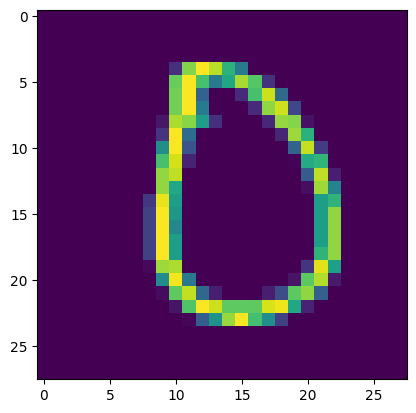

In [2]:
import matplotlib.pyplot as plt
id = np.random.randint(low = 1, high =5000)

plt.imshow(X_tr[id])
print(y_tr[id])

Just take digits 3 and 8.

Convert the 28x28 images to 1d vectors, scale pixel values to [0, 1].

In [3]:
I = np.where((y_tr == 3)|(y_tr == 8))
J = np.where((y_t == 3)|(y_t == 8))


X_train = X_tr[I].reshape((-1, 784))/255.0
X_test = X_t[J].reshape((-1, 784))/255.0

y_train = y_tr[I]
y_test = y_t[J]

print(np.shape(X_train))
print(np.shape(X_test))

print(y_train)
print(y_test)

(11982, 784)
(1984, 784)
[3 3 3 ... 8 3 8]
[3 3 3 ... 3 8 3]


# 2. Nearest neighbours

Define and train a k-NN model with K = 7 and the neighbors are weighted by the inverse of their distance. Make predictions on test set and print out the accuracy.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
clock = KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree')
clock.fit(X_train, y_train)

clock.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(clock.predict(X_test), y_test)

0.9894153225806451

# 3. Support vector machine (SVM)

Define and train an SVM Classifier with linear kernel and regularization parameter $C=1$. Make predictions on test set and print out the accuracy.

In [5]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9702620967741935


# 4. Logistic regression

Define and train a logistic regression model with $\ell_1$-penalty with regularization strength $C=1$ using liblinear optimizier. Make predictions on test set and print out the accuracy.

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_test))

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

[3 3 3 ... 8 8 3]
Accuracy: 0.9662298387096774
